In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataframe = pd.read_csv('coinbase_data_clean.csv')
data = dataframe.drop(['Timestamp'],axis=1)
output = data['WP_Increase']
data.drop(labels=['WP_Increase'],axis=1,inplace=True)
data.insert(len(data.columns),'WP_Increase',output)

In [23]:
# Need to drop timestamp to be able to convert to tensor
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
sc = MinMaxScaler()
sc = sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [27]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

### Create Tensors

In [28]:
# Pytorch Libraries
import torch
import torch.nn as nn # helps create models
import torch.nn.functional as F

In [29]:
# Convert arrays to tensors for Pytorch to process
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [30]:
# Create Model
class ANN(nn.Module):
    
    def __init__(self,input_features=16,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1) # connect input to hidden layer 1
        self.f_connected2 = nn.Linear(hidden1,hidden2) # connect hidden layer 1 to hiddent layer 2
        self.out = nn.Linear(hidden2,out_features) # connect hidden 2 to output
        
    def forward(self,x): # forward propogation
            x = F.relu(self.f_connected1(x)) 
            x = F.relu(self.f_connected2(x))
            x = self.out(x)
            
            return x

### Instantialize ANN Model

In [31]:
torch.manual_seed(20)
model = ANN()

In [32]:
model.parameters

<bound method Module.parameters of ANN(
  (f_connected1): Linear(in_features=16, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

### Backpropogation

In [33]:
# Define loss function, define optimizer
loss_function = nn.CrossEntropyLoss() # useful for multiclassification problem
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [34]:
epochs=500
final_losses = []
for i in range(epochs):
    i += 1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10 == 1:
        print('Epoch number:{} and the loss: {}'.format(i,loss.item()))
    
    # optimizer
    optimizer.zero_grad() # help reduce loss
    loss.backward() # backpropogate - find derivative
    optimizer.step() # performs single optimization step

Epoch number:1 and the loss: 0.6866819858551025
Epoch number:11 and the loss: 0.6813878417015076
Epoch number:21 and the loss: 0.6797021627426147
Epoch number:31 and the loss: 0.677613377571106
Epoch number:41 and the loss: 0.6744110584259033
Epoch number:51 and the loss: 0.6696444749832153
Epoch number:61 and the loss: 0.6641736030578613
Epoch number:71 and the loss: 0.6587622761726379
Epoch number:81 and the loss: 0.6535240411758423
Epoch number:91 and the loss: 0.6462725400924683
Epoch number:101 and the loss: 0.6429579854011536
Epoch number:111 and the loss: 0.6386714577674866
Epoch number:121 and the loss: 0.6360685229301453
Epoch number:131 and the loss: 0.6303420066833496
Epoch number:141 and the loss: 0.6319394111633301
Epoch number:151 and the loss: 0.6248274445533752
Epoch number:161 and the loss: 0.6201677322387695
Epoch number:171 and the loss: 0.6146542429924011
Epoch number:181 and the loss: 0.612663984298706
Epoch number:191 and the loss: 0.6076223850250244
Epoch number:

Text(0.5, 0, 'Epoch')

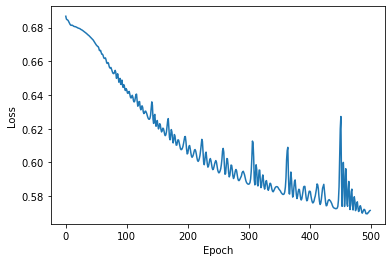

In [35]:
 # plot loss function
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

### Deploy model on test data

In [36]:
pred = []

with torch.no_grad():
    for i,data in enumerate(X_test):
        print(model(data))

tensor([-0.0870,  0.1911])
tensor([ 0.8209, -0.7815])
tensor([ 0.0744, -0.0126])
tensor([-0.0662,  0.0426])
tensor([-0.7223,  0.6830])
tensor([-0.0754,  0.1429])
tensor([-0.3755,  0.4729])
tensor([-0.3520,  0.4296])
tensor([-0.1499,  0.1570])
tensor([-1.9793,  2.1979])
tensor([-0.8237,  0.8370])
tensor([-0.7122,  0.6972])
tensor([-0.0387,  0.1519])
tensor([-0.6274,  0.5612])
tensor([-0.1696,  0.1823])
tensor([-0.7380,  0.6985])
tensor([-0.2455,  0.3345])
tensor([-0.2938,  0.3843])
tensor([-0.0557,  0.1684])
tensor([-0.3295,  0.3608])
tensor([-1.3299,  1.5018])
tensor([-0.1693,  0.4427])
tensor([-0.9341,  1.2186])
tensor([-0.1839,  0.2225])
tensor([-0.7065,  0.6880])
tensor([ 0.5284, -0.4107])
tensor([-0.9858,  0.9177])
tensor([-0.2303,  0.1924])
tensor([-0.0983,  0.1102])
tensor([-0.6304,  0.5945])
tensor([-1.0661,  1.4129])
tensor([-0.2685,  0.3683])
tensor([-0.1459,  0.2191])
tensor([0.0556, 0.0407])
tensor([ 0.3793, -0.3430])
tensor([-0.6652,  0.6706])
tensor([-0.5105,  0.6282])
ten

In [37]:
# predict classifcation - to buy or not to buy
pred2 = []

with torch.no_grad():
    for i,data in enumerate(X_test):
        pred = model(data)
        pred2.append(pred.argmax().item())
        print(pred.argmax().item()) # argmax returns index with maximum value; item returns 0 or 1

1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
0
0
0
1
1
0
1
1
1
1
1
1
1
0
1
1
0
0
1
0
0
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
0
0
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
0
1
1
1
1
1
1
1
0
0
1
1
1
0
1
1
1
1
1
0
1
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
0
1
0
1
1
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
0
0
0
1
1
1
0
0
1
1
1
1
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
1
1
0
1
0
1
0
0
0
0
0
0
1
0
1
1
1
1
0
0
1
1
0
1
0
0
1
1
1
1
1
1
1
0
0
1
1
1
1
0
0
1
1
1
1
1
1
0
1
1
1
0
1


In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test,pred2)
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))
print(accuracy_score(y_test,pred2))

[[ 43  83]
 [ 27 120]]
              precision    recall  f1-score   support

           0       0.61      0.34      0.44       126
           1       0.59      0.82      0.69       147

    accuracy                           0.60       273
   macro avg       0.60      0.58      0.56       273
weighted avg       0.60      0.60      0.57       273

0.5970695970695971
